SI 365
------
Final Project

Team Iguana
-----------
Allan Chen - Jess Brown - Zoe Halbeisen

Exploring Serious Crime and Poverty in Texas
----------------------------------------------

In [1]:
# import necessary libraries

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

sns.set(style='dark', color_codes=True, font_scale=1.3)

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

import bokeh.sampledata
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Inferno256 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as tx_counties

In [2]:
df_inmates = pd.read_csv('exinmates.csv', encoding="latin-1")
df_inmates = df_inmates.set_index("Execution No.")
df_inmates.head()

,TDCJ Number,First Name,Last Name,Date Received,Age Received,Date of Offense,Age at Offense,Execution Date,Execution Age,Gender,...,Eye Color,Hair Color,Native State,Last Statement,Sentiment,More Info URL,Last Statement URL,Poverty Rate,YOB,ex year
Execution No.,,,,,,,,,,,,,,,,,,,,,
545,999275,Ruben,Cardenas,7/29/1998,28.0,2/22/1997,26.0,11/9/2017,47,Male,...,Brown,Black,Mexico,This is my statement:ÌâåÊ My final words.ÌâåÊ ...,-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,45.4,1970,11/9/2017
544,999411,Robert,Pruett,4/30/2002,22.0,12/17/1999,20.0,10/12/2017,38,Male,...,Brown,Blonde,Texas,I just want to let everyone in here to know I ...,-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,26.6,1979,10/12/2017
543,999494,Taichin,Preyor,3/30/2005,34.0,2/26/2004,33.0,7/27/2017,46,Male,...,Brown,Black,Texas,"First and foremost I'd like to say, ""Justice h...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,21.6,1971,7/27/2017
542,997,James,Bigby,NaN,NaN,NaN,NaN,3/14/2017,61,NaN,...,NaN,NaN,NaN,"Yes, I do, Grace Kehler is that you? I have gi...",-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,12.3,1956,3/14/2017
541,999145,Rolando,Ruiz,NaN,NaN,NaN,NaN,3/7/2017,44,NaN,...,NaN,NaN,NaN,"Yes sir, I would first like to say to the Sanc...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,19.4,1973,3/7/2017


In [3]:
# read in data from files
pov_rates = pd.read_csv('pov_rates.csv')
county_codes = pd.read_csv('county_codes.csv')

In [4]:
county_codes.head()

,County,FIPS #
0,Anderson,1
1,Andrews,3
2,Angelina,5
3,Aransas,7
4,Archer,9


In [5]:
pov_rates.head()

,FIPS #,Year,Rate
0,1,1989,20.5
1,1,1993,20.8
2,1,1995,20.1
3,1,1996,NaN
4,1,1997,20.4


In [6]:
# merge poverty rates with county names
pov_by_county = pd.merge(pov_rates, county_codes, on='FIPS #')
pov_by_county = pov_by_county.drop("FIPS #", axis=1).set_index("County")

# No data for 1996
pov_by_county = pov_by_county[pov_by_county.Year != 1996]
pov_by_county.head()

,Year,Rate
County,,
Anderson,1989,20.5
Anderson,1993,20.8
Anderson,1995,20.1
Anderson,1997,20.4
Anderson,1998,18.6


In [7]:
# Setting poverty rate based on the inmate's county and year of birth
povs = df_inmates.copy()

for inmate in povs.iterrows():  
    povs.loc[inmate[0]]['Poverty Rate'] = pov_by_county[(pov_by_county.index==povs.loc[inmate[0]]['County']) 
                                                       & (pov_by_county["Year"]==povs.loc[inmate[0]]['YOB'])]

df_inmates = povs.copy()
df_inmates.head()

c:\users\jess\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TDCJ Number,First Name,Last Name,Date Received,Age Received,Date of Offense,Age at Offense,Execution Date,Execution Age,Gender,...,Eye Color,Hair Color,Native State,Last Statement,Sentiment,More Info URL,Last Statement URL,Poverty Rate,YOB,ex year
Execution No.,,,,,,,,,,,,,,,,,,,,,
545,999275,Ruben,Cardenas,7/29/1998,28.0,2/22/1997,26.0,11/9/2017,47,Male,...,Brown,Black,Mexico,This is my statement:ÌâåÊ My final words.ÌâåÊ ...,-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,45.4,1970,11/9/2017
544,999411,Robert,Pruett,4/30/2002,22.0,12/17/1999,20.0,10/12/2017,38,Male,...,Brown,Blonde,Texas,I just want to let everyone in here to know I ...,-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,26.6,1979,10/12/2017
543,999494,Taichin,Preyor,3/30/2005,34.0,2/26/2004,33.0,7/27/2017,46,Male,...,Brown,Black,Texas,"First and foremost I'd like to say, ""Justice h...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,21.6,1971,7/27/2017
542,997,James,Bigby,NaN,NaN,NaN,NaN,3/14/2017,61,NaN,...,NaN,NaN,NaN,"Yes, I do, Grace Kehler is that you? I have gi...",-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,12.3,1956,3/14/2017
541,999145,Rolando,Ruiz,NaN,NaN,NaN,NaN,3/7/2017,44,NaN,...,NaN,NaN,NaN,"Yes sir, I would first like to say to the Sanc...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,19.4,1973,3/7/2017


In [8]:
df_inmates['Age Received'].mean()

28.564935064935064

In [9]:
df_inmates['Age at Offense'].mean()

26.954545454545453

Most inmates on average enter death row approximately 2.5 years after their offense (quick turn around time).

In [10]:
df_inmates['Execution Age'].mean()

39.339449541284402

Most inmates on average stay on death row for approximately 11 years before being executed.

In [11]:
df_inmates['Gender'].value_counts()

Male      150
Female      3
male        1
Name: Gender, dtype: int64

Clearly, males outnumber females.

In [12]:
df_inmates['Race'].value_counts()

White       242
Black       198
Hispanic    103
Other         2
Name: Race, dtype: int64

A majority of inmates being White, with a close 2nd of Black.

In [13]:
df_inmates['Education Level'].max()

12.0

In [14]:
df_inmates['Education Level'].min()

3.0

In [15]:
df_inmates['Education Level'].mean()

9.8766233766233764

The lowest being 3rd grade and the highest finishing high school, inmates average an education level of 9th grade.

In [16]:
df_inmates['Sentiment'].value_counts()

 1    200
 0    192
-1    153
Name: Sentiment, dtype: int64

A very close distribution between positive, negative, and neutral sentiments.  However, inmates are more positive at the time of their death.

In [17]:
df_inmates['Poverty Rate'].mean()

17.570458715596331

The average poverty rate for each executed prisoner during their year of birth (or closest available year) is 17.57%

In [18]:
pov_by_county.groupby("Year").describe()

Rate                                                       
      count       mean       std  min     25%    50%     75%   max
Year                                                              
1989  253.0  19.985771  8.634788  5.6  14.200  18.70  24.500  55.2
1993  254.0  20.132283  7.230473  4.3  15.925  19.40  23.100  49.9
1995  254.0  20.188583  7.788183  3.5  15.425  19.20  23.875  52.0
1997  254.0  19.279134  7.001682  4.7  14.700  18.40  23.000  46.7
1998  254.0  18.381102  6.583339  4.0  14.325  17.40  21.450  43.8
1999  254.0  17.548819  6.171128  4.4  13.925  16.70  20.050  44.9
2000  254.0  17.763780  6.139687  4.3  13.925  17.00  20.500  42.2
2001  254.0  17.674803  5.942591  4.7  13.625  16.90  20.600  40.4
2002  254.0  17.300000  5.667828  4.8  13.650  16.50  20.100  39.0
2003  254.0  16.821654  4.915978  5.4  13.800  16.40  19.175  36.4
2004  254.0  16.483858  4.975594  5.5  13.250  16.10  19.000  34.8
2005  254.0  18.510630  6.422915  5.0  14.500  18.10  21.175  45.7
2006  254.0  18.311417  6.285669  4.9  14.400  17.50  21.200  44.4
2007  254.0  17.403543  6.025016  5.0  13.625  16.50  20.100  40.7
2008  254.0  17.040945  5.724275  6.2  13.400  15.95  20.500  36.8
2009  254.0  17.983465  6.016273  5.5  14.125  17.20  20.700  41.6
2010  254.0  18.540157  6.020857  6.4  14.500  18.20  21.300  39.9
2011  254.0  18.704331  6.017374  6.0  14.625  17.90  21.775  39.3
2012  254.0  18.324803  5.915182  6.7  14.300  17.80  21.275  43.6
2013  254.0  18.149606  5.651617  6.6  14.225  17.90  21.600  43.1
2014  254.0  17.455512  5.480265  6.8  13.825  17.20  20.375  38.8
2015  254.0  16.818504  5.327074  6.0  13.200  16.50  19.975  35.4

Average poverty rates for all Texas counties for every available year.

In [19]:
avg_pov_rates = pov_by_county.groupby("County").describe()['Rate']['mean']

In [20]:
# looking at poverty rates for each county for each year of birth
counties = df_inmates[['County', 'Poverty Rate']]

counties = counties.set_index("County")
counties['Inmates'] = df_inmates['County'].value_counts()
counties = counties.reset_index()

counties.head()

,County,Poverty Rate,Inmates
0,Hidalgo,45.4,6
1,Bee,26.6,2
2,Bexar,21.6,44
3,Tarrant,12.3,40
4,Bexar,19.4,44


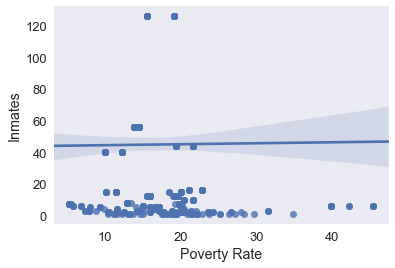

In [21]:
sns.regplot(x="Poverty Rate", y="Inmates", data=counties)

Correlation between inmate numbers and poverty rates

In [22]:
np.corrcoef(x=counties["Poverty Rate"], y=counties["Inmates"])

array([[ 1.        ,  0.00732972],
       [ 0.00732972,  1.        ]])

Correlation coefficient between inmate numbers and poverty rates

In [23]:
x = counties['Poverty Rate']
y = counties['Inmates']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ("All inmates\nSlope: {}\nIntercept: {}\nr-value: {}\np-value: {}\nStd. Error: {}".format(slope, intercept, r_value, p_value, std_err))

All inmates
Slope: 0.061527916181735774
Intercept: 43.82351344483545
r-value: 0.007329715578460725
p-value: 0.8644413029031214
Std. Error: 0.36022471197567885


3 or more inmates
Slope: 0.41018374292506804
Intercept: 44.50654102952373
r-value: 0.04892872815022738
p-value: 0.2887712864620684
Std. Error: 0.38622920452985654


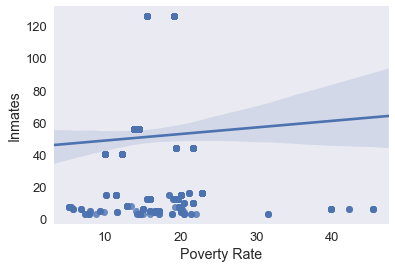

In [35]:
# limiting data to counties with 3 or more inmates
counties_3 = counties[counties.Inmates > 2]
sns.regplot(x="Poverty Rate", y="Inmates", data=counties_3)
x = counties_3['Poverty Rate']
y = counties_3['Inmates']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ("3 or more inmates\nSlope: {}\nIntercept: {}\nr-value: {}\np-value: {}\nStd. Error: {}".format(slope, intercept, r_value, p_value, std_err))

10 or more inmates
Slope: 2.136562272204252
Intercept: 29.62980516429316
r-value: 0.15838181031433324
p-value: 0.0026537585960542545
Std. Error: 0.7059414373897345


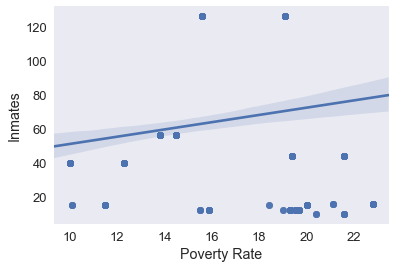

In [36]:
# limiting data to counties with 10 or more inmates
counties_10 = counties[counties.Inmates > 9]
sns.regplot(x="Poverty Rate", y="Inmates", data=counties_10)
x = counties_10['Poverty Rate']
y = counties_10['Inmates']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ("10 or more inmates\nSlope: {}\nIntercept: {}\nr-value: {}\np-value: {}\nStd. Error: {}".format(slope, intercept, r_value, p_value, std_err))

100 or less inmates (removed outliers)
Slope: -0.6628115388036796
Intercept: 31.97520623686704
r-value: -0.21234843479247167
p-value: 1.1664127462980412e-05
Std. Error: 0.14936669341233727


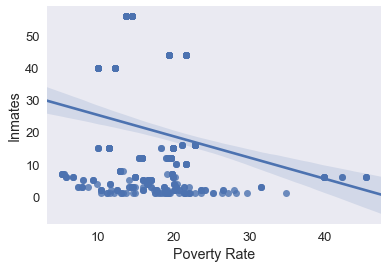

In [37]:
# limiting data to counties with 100 or less inmates
counties_100 = counties[counties.Inmates < 101]
sns.regplot(x="Poverty Rate", y="Inmates", data=counties_100)
x = counties_100['Poverty Rate']
y = counties_100['Inmates']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ("100 or less inmates (removed outliers)\nSlope: {}\nIntercept: {}\n\
r-value: {}\np-value: {}\nStd. Error: {}".format(slope, intercept, r_value, p_value, std_err))

3 < inmates < 100
Slope: -0.5708542547405234
Intercept: 34.198703062092726
r-value: -0.18923430682626494
p-value: 0.00040125989154267866
Std. Error: 0.15970832090548276


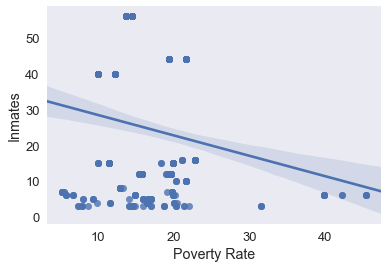

In [38]:
# limiting data to counties between 3 and 100 inmates
counties_100_3 = counties[(counties.Inmates < 101) & (counties.Inmates > 2)]
sns.regplot(x="Poverty Rate", y="Inmates", data=counties_100_3)
x = counties_100_3['Poverty Rate']
y = counties_100_3['Inmates']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ("3 < inmates < 100\nSlope: {}\nIntercept: {}\n\
r-value: {}\np-value: {}\nStd. Error: {}".format(slope, intercept, r_value, p_value, std_err))

In [39]:
counties = counties.set_index("County")
counties.head()

,Poverty Rate,Inmates
County,,
Hidalgo,45.4,6
Bee,26.6,2
Bexar,21.6,44
Tarrant,12.3,40
Bexar,19.4,44


In [34]:
# creating dataframe with only unique County values to use for inmate counts
unique_counties = counties.reset_index().drop_duplicates(subset='County').set_index("County")
unique_counties.head()

,Poverty Rate,Inmates
County,,
Hidalgo,45.4,6
Bee,26.6,2
Bexar,21.6,44
Tarrant,12.3,40
Dallas,13.8,56


In [35]:
avg_inmate_pov_rate = counties.groupby("County").describe()['Poverty Rate']['mean']

In [40]:
# setting up values for Bokeh visualization
palette.reverse()
color_mapper = LogColorMapper(palette=palette)

TOOLS = "pan,wheel_zoom,reset,hover,save"

tx_counties = {
    code: county for code, county in tx_counties.items() if county["state"] == "tx"
}

# setting all county latitudes/longitudes
county_xs = [county["lons"] for county in tx_counties.values()]
county_ys = [county["lats"] for county in tx_counties.values()]

# setting counties with inmates latitudes/longitudes
inmate_county_xs = [county["lons"] for county in tx_counties.values() if county['name'] in counties.index]
inmate_county_ys = [county["lats"] for county in tx_counties.values() if county['name'] in counties.index]

# getting all county names and poverty rates
county_names = [county['name'] for county in tx_counties.values()]
county_rates = [avg_pov_rates[name] for name in county_names]

# getting counties with inmates names and rates
inmate_county_names = [county['name'] for county in tx_counties.values() if county['name'] in counties.index]
inmate_county_rates = [avg_inmate_pov_rate[name] for name in county_names if name in counties.index]

# getting number of inmates per county
exinmates = [0 for count in tx_counties]
inmate_exinmates = [unique_counties.loc[name]['Inmates'] for name in counties.index.unique()]

In [42]:
# source for all counties
other_source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
    exinmates=exinmates
))

# source for inmate counties
inmate_source = ColumnDataSource(data=dict(
    x=inmate_county_xs,
    y=inmate_county_ys,
    name=inmate_county_names,
    rate=inmate_county_rates,
    exinmates=inmate_exinmates
))

# create Bokeh figure
p = figure(
    title="Texas Executed Inmates", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

# make Texas and outline all counties
p.patches('x', 'y', source=other_source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.1)

# highlight inmate counties
p.patches('x', 'y', source=inmate_source,
         fill_color={'field': 'rate', 'transform': color_mapper},
         fill_alpha=0.7, line_color="white", line_width=1.75)

# create mouse-hover ability
hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Poverty rate", "@rate%"),
    ("Total inmates", "@exinmates")
]

# create visualization
show(p)